# Sensors and Signal Analysis 2025
Author: Nuno Azevedo Silva

### Week 2 offline work, preparation for Activity 2

This notebook is an activity to consolidate the concepts of week 2 and prepare hands-on activity 2 where you will determine the transfer function and calibrate a real-world sensor by yourself. Indeed, week 2 and 3 introduces the most important concepts of signal processing and analysis, but in its essence, it is all about understanding what you should do to compute the transfer function of a sensor.


In concept, knowing each applied stimulus $s_i$ (normally well-known standards), one can determine the transfer function 

$$E_i = F(s_i)$$

where $E_i$ is the output of our sensor (can be voltage, shift, frequency, time, etc). To systhematize, your objective is to:
1. Estimate $E_i$ (using statistical procedures to observe the statistical distribution and usually apply a central tendency estimator);
2. Estimate each associated uncertainty $u_i$;
3. Plot the transfer function and characterize your sensor.

Finally, having the trasnfer funciont, you can invert the model using curve fitting procedures to determine the calibration curve $C$ that a end-user can utilize has

$$ s_m = C(E)$$

to obtain a measure for $s_m$.



## 1. Static Response

The static response of a sensor refers to its behavior under steady-state conditions, where the quantity being measured does not change over time. 
For this activity we'll have the measured signals of 3 sensors A, B and C for a set of 20 stimuli. Each signal corresponds to the measured steady-state response to a given stimuli during 10 seconds.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Load data

time = np.loadtxt('time.txt')
stimulus = np.loadtxt('stimulus.txt')
data_sensorA = np.loadtxt('data_sensorA.txt')
data_sensorB = np.loadtxt('data_sensorB.txt')
data_sensorC = np.loadtxt('data_sensorC.txt')

***Exercise:*** Plot the data for each sensor for the signal corresponding to a ginve stimulus (say index 10). Try to obtain something like this:

<img src="figs/figure1.png" width="500"/>

## 1.2 and 1.3 Central Tendency, uncertainty and probability

So what information will you extract from this?

Having multiple measures for the same stimulus we have an opportunity for applying statistical methods and extract meaningul information in the most correct mathematical manner. Looking at the probability distribution, mean ($\mu$), median and standard deviation is a good starting point.

----

***Exercise:*** Utilizing the hist function of matplotlib plot an histogram for the distribution of the measured signal for a given stimulus for each sensor. In the same graph represent the mean and median. What should you utilize in each?
Try to obtain something like this:

<img src="figs/figure2.png" width="500"/>

In [1]:
#### hint: you may utilize axvline to plot a vertical line

Normally if the distribution of values is a gaussian / normal distribution, a good estimate for the uncertainty is the standard deviation. Yet, we see this is only the case for the signal 2, whereas signal 1 follows a more uniform distribution. The problem is that the standard deviation is defined as

$$\sigma = \sqrt{ \frac{\sum (E_i - \mu)^2}{N-1} }$$

and while the interval $[\mu - \sigma, \mu +\sigma]$ contains 68.3\% for the, this is only valid for the gaussian distribution.

-------------------------


***Exercise:*** Taking sensor A, B, and C data for the same stimuli, prove this by plotting the standard deviation and interquartile range in the same graphs for the various distributions. An interesting trick for data analysis is to compute the kernel density estimator. 

Try to obtain something like this:

<img src="figs/figure3.png" width="500"/>

In [2]:
#### hint: use numpy percentile function, you may utilize axvspan to fill between two vertical lines

For Sensor A it is a good approximation to consider the standard deviation, but for sensor B a better estimate of the uncertainty maybe to utilize the concept of quantiles, i.e. the cut points that divide the probability distribution. 

So far we are assuming that we only have type A uncertainties. In the case we had type B one would apply the standard formula
$$u = \sqrt{u_A^2 + u_B^2}$$

-------------------------------

***Exercise*** Consider a fixed value for u_B (e.g. 0.02) and get an estimate for each sensor, for each measurement $\{s_i, E_i\}$. For the present case consider the 95\% confidence interval: for that, you take $2\sigma$ for sensor A and 2.5\% - 97.5\% percentile for sensor B.

In [3]:
###hint: for cycle to create an output signal and uncertainty for each stimulus for each sensor

## 1.4. Signal-to-noise Ratio

Having an estimate for uncertainty is an opportunity for estimating the Signal to Noise Ratio - SNR. One of the definitions of the SNR is to consider the mean and estimate for the standard deviation
For Powers
$$SNR = \frac{P_{signal}}{P_{noise}}$$
or in dB
$$SNR = 10 \log_{10} \frac{P_{signal}}{P_{noise}}$$
for amplitudes
$$SNR = \frac{A^{2}_{signal}}{A^{2}_{noise}}$$
or in dB
$$SNR = 20 \log_{10} \frac{A_{signal}}{A_{noise}}$$


---------------------------

***Exercise*** Estimate the SNR for each sensor for two distinct stimulus. You may utilize the uncertainty as noise level as a ratio and in dB. What do you conclude considering distinct stimulus?

## 1.5. Transfer Function and calibration model

Having the output signal associated to known stimuli (also called standards), we have the necessary conditions to compute the transfer function for the three sensors.

***Exercise:*** Plot the transfer function for each sensor. Utilizing a spline interpolation. Analyze each of the sensors taking into consideration the characteristics we have defined during week 1, namely:
- Span, Full-scale Output, Dynamic Range, and Deadband;
- Linearity and saturation;
- Sensitivity, by computing a numerical derivative.

Try to obtain something like this:

<img src="figs/fig4.png" width="600"/>

In [4]:
###Hint: Plot using errorbar, interpolate using scipy CubicSpline, utilize parameter nu to compute derivative


***Exercise:*** For sensor C compute a calibration model for the linear region, providing the numerical expression and accuracy.

Try to obtain something like this:

<img src="figs/fig5.png" width="300"/>

In [ ]:
##Hint: utilize scipy curve_fit for regression
from scipy.optimize import curve_fit

## 2. Time Varying signals

In contrast to static response, time-varying response can also be the output of your sensor and correspond to all the situations when the amplitude of a signal varies with time.

In this next part we will explore how to extract features from these signals that may relate with the applied stimulus.

In [1]:
#just some functions to generate some mockup data to analyze

import numpy as np
import matplotlib.pyplot as plt
tstop = 30
time = np.linspace(0,tstop,tstop*1000)
dt=time[1]-time[0]

def gensignalA(t):
    brownian_noise = np.cumsum(np.random.normal(loc=0, scale=0.7*np.sqrt(t[1]-t[0]), size=len(t)))
    ff = 5  
    ff2 = 0.1
    return np.cos(2*np.pi*ff2*t)*(np.cos(2*np.pi*(ff) * t + .0*np.random.random(len(t))) + 0.2*np.random.normal(loc=0, scale=0.7, size=len(t)))

def gensignalB(t):
    brownian_noise = np.cumsum(np.random.normal(loc=0, scale=0.7*np.sqrt(t[1]-t[0]), size=len(t)))
    ff = 5  
    ff2 = 0.1
    return np.cos(2*np.pi*ff2*t)*np.cos(2*np.pi*(ff) * (t-0.1)) + 1*brownian_noise

signalA = gensignalA(time)
signalB = gensignalB(time)

## 2.1 Time Domain Features

***Exercise:*** Plot the signalA and compute some time-domain features:
- Mean and Median;
- Standard Deviation;
- Root Mean Square;
- Maximum, Minimum, and Peak-to-peak;
- Skewness;


Try to obtain something like this:

<img src="figs/fig6.png" width="500"/>

## 2.2 Frequency Domain Features

***Exercise:*** Compute the Fourier transform and the Power spectral density. Compare both. Characterize the type of noise you find in signalB.


Try to obtain something like this:

<img src="figs/fig7.png" width="300"/> <img src="figs/fig8.png" width="300"/>

***Exercise:*** For the same signal compute the Fourier transform and extract some frequency domain features:
- Fundamental Frequency;
- Spectral Centroid;
- Spectral Bandwidth;
- Spectral Entropy;

Below we have auxiliary functions that provide these features from FFT Magnitude or PSD. Take a look if they are ok and then utilize them to compute the features.
Comment the results, are they expected?

In [ ]:
## auxiliary functions  -  take a look to understand them


### Feature extraction from magnitude#################################


def compute_fundamental_frequency_magnitude(sig, fs):
    N = len(sig)
    yf = np.fft.fft(sig)
    xf = np.linspace(0.0, fs / 2, N // 2)
    magnitudes = 2.0 / N * np.abs(yf[:N // 2])
    peaks, _ = scipy.signal.find_peaks(magnitudes)
    fundamental_freq = xf[peaks][0]  # assuming the first peak is the fundamental frequency
    return fundamental_freq


def compute_spectral_bandwidth_magnitude(signal, fs):
    magnitudes = np.abs(np.fft.rfft(signal))
    length = len(signal)
    frequencies = np.abs(np.fft.fftfreq(length, 1.0/fs)[:length//2+1])
    spectral_centroid = np.sum(frequencies * magnitudes) / np.sum(magnitudes)
    spectral_bandwidth = np.sqrt(np.sum(((frequencies - spectral_centroid) ** 2) * magnitudes) / np.sum(magnitudes))
    return spectral_bandwidth

def compute_spectral_centroid_magnitude(signal, fs):
    magnitudes = np.abs(np.fft.rfft(signal))
    length = len(signal)
    frequencies = np.abs(np.fft.fftfreq(length, 1.0/fs)[:length//2+1])
    spectral_centroid = np.sum(frequencies * magnitudes) / np.sum(magnitudes)
    return spectral_centroid

def compute_spectral_entropy_magnitude(signal, fs):
    eps = np.finfo(np.float32).eps
    magnitude = np.abs(np.fft.fft(signal)) ** 2
    magnitude= magnitude[:len(signal) // 2]
    magnitude /= magnitude.sum() + eps  # Normalize
    spectral_entropy = -np.sum(magnitude * np.log2(magnitude + eps))
    return spectral_entropy

## auxiliary functions - take a look to understand them

### Feature extraction from Power spectral density

def compute_fundamental_frequency_PSD(signal, fs):

    f, Pxx = scipy.signal.welch(signal, fs, nperseg=1024)
    peaks, _ = scipy.signal.find_peaks(Pxx)
    fundamental_freq = f[peaks][0]  # assuming the first peak is the fundamental frequency
    return fundamental_freq


def compute_spectral_bandwidth_PSD(signal, fs):
    f, Pxx = scipy.signal.welch(signal, fs, nperseg=1024)
    spectral_centroid = np.sum(f * Pxx) / np.sum(Pxx)
    spectral_bandwidth = np.sqrt(np.sum(((f - spectral_centroid) ** 2) * Pxx) / np.sum(Pxx))
    return spectral_bandwidth

def compute_spectral_centroid_PSD(signal, fs):
    f, Pxx = scipy.signal.welch(signal, fs, nperseg=1024)
    spectral_centroid = np.sum(f * Pxx) / np.sum(Pxx)
    
    return spectral_centroid

def compute_spectral_entropy_PSD(signal, fs):
    eps = np.finfo(np.float32).eps
    f, Pxx = scipy.signal.welch(signal, fs, nperseg=1024)
    Pxx /= Pxx.sum() + eps  # Normalize
    spectral_entropy = -np.sum(Pxx * np.log2(Pxx + eps))
    return spectral_entropy


## 2.3 Correlation

***Exercise:*** Computing the correlation between signalA and signalB try to understand if they are correlated and if there is any lag between them. Comment the results

You should obtain something like this:

<img src="figs/fig9.png" width="300"/>


In [2]:
#hint use numpy correlate with mode='full'

## 2.4 Time-Frequency Analysis

***Demonstration:*** Focusing on signalC, use time-frequency analysis tools to construct a spectrogram. Do that using:
1. Short-time Fourier Transform;
2. Wavelet analysis;

Comment the results.

In [8]:
##Here we will generate the signal to get an idea of what we are seeing

def s(t):
    t0=10
    #return np.sin((0.1*t)*t) + np.sin((100/(t+10))*t)
    f1=.5
    f2=2
    f3=4
    f4=1
    f0=0.5
    return (3*np.sin(2*np.pi*f0*t)
            +5*np.exp(-(t-t0)**2*0.5)*np.sin(2*np.pi*f1*t) 
            + 5*np.exp(-(t-30)**2*0.5)*np.sin(2*np.pi*f2*t) 
             + 5*np.exp(-(t-80)**2*0.5)*np.sin(2*np.pi*f4*t) 
             +10*np.exp(-(t-50)**2*3)*np.sin(2*np.pi*f3*t) 
              )* np.exp(-t/600) + np.random.random(len(t))


fs = 30  # Sampling frequency
t_f  = 100
t = np.linspace(0, t_f, fs*t_f)


signalC = s(t)

In [12]:
#Hint: utilize the pywt, spectrogram

from scipy.signal import spectrogram
from scipy import signal
import pywt

# widths = np.arange(1,61) # Widths to use for the CWT
# cwt_result = cwt(signal, ricker, widths)
t = np.arange(len(signalC)) / fs

coef, freqs = pywt.cwt(signalC, np.arange(1, 61), 'cmor',
                       sampling_period=1/fs)

# Plotting

fig,ax = plt.subplots(3,1,figsize=(6, 6))

ax[0].plot(t,signalC)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal (arb.units)')

im = ax[1].pcolor(t, freqs, np.abs(coef), cmap='inferno')

#im = ax[1].imshow(np.abs(cwt_result), extent=[t[0], t[-1], widths[-1], widths[0]], origin='upper', cmap='jet', aspect='auto', vmax=np.max(cwt_result), vmin=np.min(cwt_result))
plt.colorbar(im,ax=ax[1],label='Magnitude')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_title('Wavelet Spectrogram')
ax[1].set_yscale('log')


f, t, Sxx = spectrogram(signalC, fs,nperseg=32)
im = ax[2].pcolormesh(t, f, (Sxx), shading='gouraud', cmap='inferno')
plt.colorbar(im,label='Magnitude')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Frequency [Hz]')
ax[2].set_title('STFT Spectrogram')

fig.tight_layout()



c:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

c:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


## 3. Aliasing

***Demonstration:*** Effect of aliasing in the spectral signature.

c:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 1024 is greater than input length  = 50, using nperseg = 50
  .format(nperseg, input_length))
c:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 1024 is greater than input length  = 8, using nperseg = 8
  .format(nperseg, input_length))
c:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 1024 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


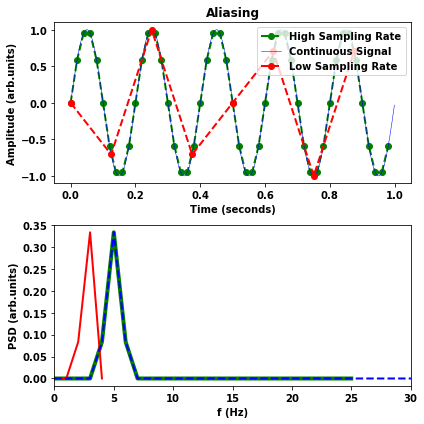

In [10]:
import scipy.signal
# Parameters for the sine wave
frequency_of_signal = 5  # frequency of the sine wave in Hz
duration = 1  # duration of the signal in seconds

# Generate a time array for the continuous signal
t_continuous = np.linspace(0, duration, 1000, endpoint=False)  # High resolution for continuous representation
signal_continuous = np.sin(2 * np.pi * frequency_of_signal * t_continuous)

# Sampling the signal at two different rates
sampling_rate_high = 50  # High sampling rate (above Nyquist rate)
sampling_rate_low = 8  # Low sampling rate (below Nyquist rate)

# Generate sampled time arrays
t_sampled_high = np.linspace(0, duration, sampling_rate_high * duration, endpoint=False)
t_sampled_low = np.linspace(0, duration, sampling_rate_low * duration, endpoint=False)

# Sample the continuous signal
signal_sampled_high = np.sin(2 * np.pi * frequency_of_signal * t_sampled_high)
signal_sampled_low = np.sin(2 * np.pi * frequency_of_signal * t_sampled_low)

# Plotting
fig,ax = plt.subplots(2,1,figsize=[6,6])


# Plot high sampling rate signal

ax[0].plot(t_sampled_high, signal_sampled_high, 'g' ,ls='--',lw=2,marker='o', label='High Sampling Rate')
ax[0].plot(t_continuous, signal_continuous, 'b-',lw=0.5, label='Continuous Signal')
ax[0].set_title('Aliasing')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Amplitude (arb.units)')

ax[0].plot(t_sampled_low, signal_sampled_low, 'r',ls='--',lw=2,marker='o', label='Low Sampling Rate')

ax[0].legend(loc=1)

f, Pxx_high = scipy.signal.welch(signal_sampled_high, fs=sampling_rate_high, nperseg=1024)
ax[1].plot(f,Pxx_high, 'g' ,ls='-',lw=4,marker='None', label='High Sampling Rate')

f, Pxx_low = scipy.signal.welch(signal_sampled_low, fs=sampling_rate_low, nperseg=1024)
ax[1].plot(f,Pxx_low, 'r' ,ls='-',lw=2,marker='None', label='Low Sampling Rate')

f, Pxx_continuous = scipy.signal.welch(signal_continuous, fs=1/(t_continuous[1]-t_continuous[0]), nperseg=1024)
ax[1].plot(f,Pxx_continuous, 'b' ,ls='--',lw=2,marker='None', label='Continuous')
ax[1].set_xlabel('f (Hz)')
ax[1].set_ylabel('PSD (arb.units)')
ax[1].set_xlim(0,30)
fig.tight_layout()

# Plot low sampling rate signal


# 4.Filters

We introduced 2 types of filter, frequency and time-domain.

***Demonstration:*** Filter signalA and signalB using:
1. Fourier domain with Butterworth filter.
2. Moving-Average;
3. Compare the results in the time and spectral signature. Try with distinct signalsC and D and change the parameters of the filter. 

What do you conclude? When to use one or the other?



In [11]:
from scipy.signal import butter, lfilter
import scipy.signal

import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget
tstop = 30
time = np.linspace(0,tstop,tstop*1000)
dt=time[1]-time[0]

def gensignalC(t):
    ff = 5  
    ff2 = 15
    return np.cos(2*np.pi*(ff) * t ) + 0.2*np.random.normal(loc=0, scale=0.7, size=len(t)) + np.cos(2*np.pi*ff2*t)


signalC = gensignalC(time)

def gensignalD(t):
    ff = 5  
    ff2 = 60
    return np.cos(2*np.pi*(ff) * t ) + 0.2*np.random.normal(loc=0, scale=0.7, size=len(t)) + np.cos(2*np.pi*ff2*t)


signalD = gensignalD(time)

# Function for moving average filter
def moving_average_filter(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')


for signal_to_analyze,data_name in zip([signalC,signalD],['Signal C','Signal D']):

    # Parameters
    window_size = 100


    # Apply the filters
    cutoff=7
    b, a = butter(N=5, Wn = cutoff, btype='low', analog=False,fs=1/dt)
    filtered_signal_butterworth =  lfilter(b, a, signal_to_analyze)
    filtered_signal_moving_average = moving_average_filter(signal_to_analyze, window_size)

    # Plot the signals
    fig,ax = plt.subplots(2,1,figsize=(5, 6))
    ax[0].plot(time, signal_to_analyze, label='Noisy Signal', alpha=0.5)
    ax[0].plot(time, filtered_signal_butterworth, label='Butterworth Filtered Signal')
    ax[0].plot(time, filtered_signal_moving_average, label='Moving Average Filtered Signal', alpha=0.7)
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('Amplitude')
    ax[0].legend()
    ax[0].set_title('Comparison of Butterworth and Moving Average Filters')


    frequencies, psd_original = scipy.signal.welch(signal_to_analyze, fs=1/dt, nperseg=1024)
    _, psd_butter = scipy.signal.welch(filtered_signal_butterworth, fs=1/dt, nperseg=1024)
    _, psd_moving_avg = scipy.signal.welch(filtered_signal_moving_average, fs=1/dt, nperseg=1024)

    ax[1].semilogy(frequencies, psd_original, label='Original Signal')
    ax[1].semilogy(frequencies, psd_butter, label='Butterworth Filtered Signal')
    ax[1].semilogy(frequencies, psd_moving_avg, label='Moving Average Filtered Signal')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('PSD')
    ax[1].legend()
    ax[1].set_title('Power Spectral Density Comparison')

    fig.tight_layout()



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## 5. Windowing

***Demonstration:*** Observing the effect of windowing. Substitue N by 1000 or 1024. See what happens and comment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency in Hz
f = 10  # Frequency of the cosine wave in Hz
N = 1024  # Number of samples

# Time vector
t = np.arange(N) / fs

# Generate the cosine signal
cosine_signal = np.cos(2 * np.pi * f * t)

# Apply a Hamming window
hamming_window = np.hamming(N)
windowed_signal = cosine_signal * hamming_window

# Perform the DFT
cosine_signal_fft = np.fft.fft(cosine_signal)
windowed_signal_fft = np.fft.fft(windowed_signal)

# Frequency vector
freqs = np.fft.fftfreq(N, 1/fs)

# Plot the original and windowed signal
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(t, cosine_signal, label='Original Signal')
plt.plot(t, windowed_signal, label='Windowed Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the magnitude spectrum
plt.subplot(1, 2, 2)
plt.plot(freqs[:N//2], np.abs(cosine_signal_fft[:N//2]), label='Original Signal FFT')
plt.plot(freqs[:N//2], np.abs(windowed_signal_fft[:N//2]), label='Windowed Signal FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()